In [1]:
import suite2p
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import re
import os
import glob
from natsort import natsorted
from multiprocessing import Pool
from joblib import Parallel, delayed
from pathlib import Path
import gc
gc.collect()
import importlib
import sys
from pathlib import Path
# Add the directory containing your script to the Python path
from suite2p import run_s2p

sys.path.append(r'C:\Users\zhangl33\Projects\Project-SLMonlineControl\CodeAndPackages\PYsubfun')

# Now you can import your script as a module
import FastBin_Suite2p as FBS
import CalBin2p as CB
import SLM_Offline as slmO

In [2]:
data= loadmat(r'D:\Project1-LocalProcessing\Step1\11-Aug-2025FOV.mat')
FOV=data['FOVUpdate']
FOVsave=data['suite2pFOVPathLocal']                    ##<<saved at local C:
#FOVref=data['suite2pFOVPath']                         ##<<saved at server
FOVref=data['suite2pFOVPathLocal']                    ##<<saved at local C:


In [3]:
def flatten_csvnames(FOV):
    # Try to flatten possible nested arrays
    csv_entries = FOV['CSVName']
    # Convert to numpy array if not already
    arr = np.array(csv_entries)
    # Flatten and convert from MATLAB cell array (object dtype)
    paths = [str(arr.flat[i][0]) for i in range(arr.size)]
    return paths

all_csv = flatten_csvnames(FOV)

In [5]:
opsTest=np.load(r'\\nimhlabstore1.nimh.nih.gov\UFNC\FNC3Z\Sutie2p-Processed\GCamP6S-CamKII\SL085503042025\sub1-2Spon\suite2p\plane0\ops.npy',allow_pickle=True).item()


In [4]:

ConfigFolder=r'C:\Users\zhangl33\Projects\Project-SLMonlineControl\config'
ops0, confSet=FBS.configLoad(ConfigFolder,'SLMsetting.yml','ops3PlanesG6.npy')
ops0['spatial_scale']=2
ops0['threshold_scaling']=0.9
ops0['denoise']=0
ops0['tau']=1.5
ops0['look_one_level_down']=False               ##This is important as the subfolders is defined in db
ops0['combined']=True

folder = r'D:\Project1-LocalProcessing\Step1'  # your path
#all_csv = [f'FOV{i}.csv' for i in range(1,FOV.shape[1]+1)]
#all_csv = [f'FOV{i}.csv' for i in range(1,FOV.shape[1]+1)]


dfs = [pd.read_csv(f) for f in all_csv]

In [7]:
FOV.shape[1]

17

In [6]:
range(17,FOV.shape[1])

range(17, 17)

In [8]:
## spontnous period
for i in range(0,FOV.shape[1]):
    FOVtemp = FOV[0, i]
    FOVtempSave=FOVsave[0,i]
    dfTemp=dfs[i]
    print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    file_ids = dfTemp.loc[(dfTemp['AwakeState'] == 0) & (pd.isna(dfTemp['markCycle'])),'FileID']   
    TiffNum = dfTemp.loc[(dfTemp['AwakeState'] == 0) & (pd.isna(dfTemp['markCycle'])), 'Suite2pTiffNum']
    print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = ops0['data_path'][0]
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}Spon"
    full_save_path = os.path.join(FOVtempSave[0], folder_name)
    print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    slmO.run_s2p_by_range(root, ops0, id_range=subFileRange)

['E:\\LuSLMOnlineTest\\SL1968\\07312025\\SingleP\\Top56SpeedStimEdgeExc\\Data\\']
24600  tiff files
C:\GCamP6S-CamKII\\SL196807312025\sub1-2Spon
No forced refImg
{'data_path': ['E:\\LuSLMOnlineTest\\SL1968\\07312025\\SingleP\\Top56SpeedStimEdgeExc\\Data\\'], 'subfolders': ['TSeries-07312025-0926-001', 'TSeries-07312025-0926-002']}
tif
** Found 24600 tifs - converting to binary **
2004 frames of binary, time 153.96 sec.
4008 frames of binary, time 301.63 sec.
6012 frames of binary, time 455.30 sec.
8016 frames of binary, time 602.25 sec.
10020 frames of binary, time 749.29 sec.
12024 frames of binary, time 896.53 sec.
14028 frames of binary, time 1055.44 sec.
16032 frames of binary, time 1208.03 sec.
18036 frames of binary, time 1353.54 sec.
20040 frames of binary, time 1505.36 sec.
22044 frames of binary, time 1658.02 sec.
24048 frames of binary, time 1810.10 sec.
time 1851.70 sec. Wrote 8200 frames per binary for 3 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not 

c:\users\zhangl33\projects\suite2p\suite2p\extraction\extract.py:125: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  Fi[n] = np.dot(data[:, cell_ipix[n]], cell_lam[n])


Extracted fluorescence from 244 ROIs in 8200 frames, 9.20 sec.
----------- Total 9.61 sec.
----------- CLASSIFICATION
['npix_norm', 'skew', 'compact']
----------- SPIKE DECONVOLUTION
----------- Total 0.09 sec.
Plane 0 processed in 214.51 sec (can open in GUI).
>>>>>>>>>>>>>>>>>>>>> PLANE 1 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not registered / registration forced with ops['do_registration']>1
      (no previous offsets to delete)
NOTE: applying default C:\Users\zhangl33\.suite2p\classifiers\classifier_user.npy
----------- REGISTRATION
Reference frame, 8.19 sec.
Registered 500/8200 in 9.01s
Registered 1000/8200 in 17.98s
Registered 1500/8200 in 26.65s
Registered 2000/8200 in 35.37s
Registered 2500/8200 in 44.10s
Registered 3000/8200 in 52.67s
Registered 3500/8200 in 61.37s
Registered 4000/8200 in 70.10s
Registered 4500/8200 in 79.32s
Registered 5000/8200 in 88.56s
Registered 5500/8200 in 97.34s
Registered 6000/8200 in 106.34s
Registered 6500/8200 in 115.01s
Registered 7000/8200 in 123.62s
Regis

In [8]:
## all awake with initial refImg defined in spontanous data
RefKeyword = ['Spon']
FunColorValue = [0.0,0.0,0.0]
sucTable = []
DistTh=10
ops0['threshold_scaling']=0.9
for i in range(16,FOV.shape[1]):
    FOVtemp = FOV[0, i]
    FOVtempSave=FOVsave[0,i]
    FOVtempRef = FOVref[0,i]
    dfTemp=dfs[i]
    print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    file_ids = dfTemp.loc[dfTemp['AwakeState'] < 2,'FileID']   
    TiffNum = dfTemp.loc[dfTemp['AwakeState'] < 2, 'Suite2pTiffNum']
    print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = Path(ops0['data_path'][0])
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}awakeRef{RefKeyword[0]}"
    full_save_path = os.path.join(FOVtempSave[0], folder_name)
    suite2pdir= os.path.join(full_save_path, 'suite2p')

    confdir=root.parent.parent.parent
    FilteredPos3D, FilteredFunScore, FilteredTestPos3D, FilteredTestTBL = slmO.load_slm_data(root.parent)
    confSet=FBS.read_yaml(os.path.join(confdir,'CurrentSLMsetting.yml'))

    
    names, pairs = slmO.subfolders_and_pairs(FOVtempRef[0],RefKeyword)
    reffull_save_path = os.path.join(FOVtempRef[0], names[0])
    refsuite2pdir= os.path.join(reffull_save_path, 'suite2p')
    print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    slmO.run_s2p_by_range(root, ops0, id_range=subFileRange, refImg_init = refsuite2pdir)


    CellPos3D, CellPos3DRaw, CaData, CaDataPlane, stat=slmO.extract_suite2p(suite2pdir, confSet)
    #iscell=CaData['iscell'][:,0]
    cellNum = CellPos3DRaw.shape[0]
    #stable_cells = slmO.ConsistentCell(matched_pairs)
    #AssignedSuite2bColor=slmO.ConsistentCellColor(stable_cells, cellNum)
    AssignedSuite2bColor = np.random.permutation(cellNum) / cellNum*0.6+0.2


    
    SLMTarget, SLMtargetCellDist=slmO.slm_target_match_cell(FilteredPos3D, CellPos3DRaw, DistTh)
    succRate=np.sum(SLMTarget>=0)/SLMTarget.shape[0]
    Ind = SLMTarget >=0 
    SuccSLMTarget = SLMTarget[Ind]

    iscellRaw=CaData['iscell']
    #print(iscellRaw)
    indices = np.where(iscellRaw[:, 0] > 0)[0]
    #print(indices)
    updateiscellTmp = np.union1d(indices, SuccSLMTarget)
    SuccSLMTargetFunI=FilteredFunScore[Ind,0]
    for iColor in range(len(np.unique(SuccSLMTargetFunI))):
        AssignedSuite2bColor[SuccSLMTarget[SuccSLMTargetFunI==iColor]]=FunColorValue[iColor]
    slmO.update_iscell(FOVtempSave[0]+folder_name+'\suite2p',updateiscellTmp,3,AssignedSuite2bColor)
    sucTable.append({ 'full_save_path': full_save_path,'sucRate': succRate})

['E:\\LuSLMOnlineTest\\SL1972\\07252025\\SingleP\\Top80SpeedStimEdgeExc\\Data\\']
87798  tiff files
C:\GCamP6S-CamKII\\SL197207252025\sub1-67awakeRefSpon
Load forced refImg
[run_s2p_by_range] Forced refImg list loaded for 3 planes: [(512, 512), (512, 512), (512, 512)]
{'data_path': ['E:\\LuSLMOnlineTest\\SL1972\\07252025\\SingleP\\Top80SpeedStimEdgeExc\\Data'], 'subfolders': ['TSeries-07252025-1029-001', 'TSeries-07252025-1029-002', 'TSeries-07252025-1029-010', 'TSeries-07252025-1029-011', 'TSeries-07252025-1029-012', 'TSeries-07252025-1029-013', 'TSeries-07252025-1029-014', 'TSeries-07252025-1029-015', 'TSeries-07252025-1029-016', 'TSeries-07252025-1029-017', 'TSeries-07252025-1029-018', 'TSeries-07252025-1029-019', 'TSeries-07252025-1029-020', 'TSeries-07252025-1029-021', 'TSeries-07252025-1029-022', 'TSeries-07252025-1029-024', 'TSeries-07252025-1029-025', 'TSeries-07252025-1029-030', 'TSeries-07252025-1029-031', 'TSeries-07252025-1029-032', 'TSeries-07252025-1029-033', 'TSeries-072

c:\users\zhangl33\projects\suite2p\suite2p\extraction\extract.py:125: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  Fi[n] = np.dot(data[:, cell_ipix[n]], cell_lam[n])


Extracted fluorescence from 115 ROIs in 29266 frames, 29.71 sec.
----------- Total 30.49 sec.
----------- CLASSIFICATION
['npix_norm', 'compact', 'skew']
----------- SPIKE DECONVOLUTION
----------- Total 0.25 sec.
Plane 0 processed in 2973.65 sec (can open in GUI).
>>>>>>>>>>>>>>>>>>>>> PLANE 1 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not registered / registration forced with ops['do_registration']>1
      (no previous offsets to delete)
NOTE: applying default C:\Users\zhangl33\.suite2p\classifiers\classifier_user.npy
----------- REGISTRATION
List of reference frames len = 3
Registered 500/29266 in 52.16s
Registered 1000/29266 in 119.27s
Registered 1500/29266 in 171.13s
Registered 2000/29266 in 222.99s
Registered 2500/29266 in 274.79s
Registered 3000/29266 in 326.44s
Registered 3500/29266 in 378.57s
Registered 4000/29266 in 430.54s
Registered 4500/29266 in 482.11s
Registered 5000/29266 in 534.60s
Registered 5500/29266 in 587.07s
Registered 6000/29266 in 639.63s
Registered 6500/29266 in 691.99s
Reg

In [32]:
i

5

In [7]:
## all awake no initial refImg defined
FunColorValue = [0.0,0.0,0.0]
sucTable = []
DistTh=10
ops0['threshold_scaling']=0.9
for i in range(5,FOV.shape[1]):
    FOVtemp = FOV[0, i]
    FOVtempSave=FOVsave[0,i]
    FOVtempRef = FOVref[0,i]
    dfTemp=dfs[i]
    print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    file_ids = dfTemp.loc[dfTemp['AwakeState'] < 2,'FileID']   
    TiffNum = dfTemp.loc[dfTemp['AwakeState'] < 2, 'Suite2pTiffNum']
    print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = Path(ops0['data_path'][0])
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}awake"
    full_save_path = os.path.join(FOVtempSave[0], folder_name)
    suite2pdir= os.path.join(full_save_path, 'suite2p')

    confdir=root.parent.parent.parent
    FilteredPos3D, FilteredFunScore, FilteredTestPos3D, FilteredTestTBL = slmO.load_slm_data(root.parent)
    confSet=FBS.read_yaml(os.path.join(confdir,'CurrentSLMsetting.yml'))

    
    #names, pairs = slmO.subfolders_and_pairs(FOVtempRef[0],RefKeyword)
    #reffull_save_path = os.path.join(FOVtempRef[0], names[0])
    #refsuite2pdir= os.path.join(reffull_save_path, 'suite2p')
    print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    slmO.run_s2p_by_range(root, ops0, id_range=subFileRange)


    CellPos3D, CellPos3DRaw, CaData, CaDataPlane, stat=slmO.extract_suite2p(suite2pdir, confSet)
    #iscell=CaData['iscell'][:,0]
    cellNum = CellPos3DRaw.shape[0]
    #stable_cells = slmO.ConsistentCell(matched_pairs)
    #AssignedSuite2bColor=slmO.ConsistentCellColor(stable_cells, cellNum)
    AssignedSuite2bColor = np.random.permutation(cellNum) / cellNum*0.6+0.2


    
    SLMTarget, SLMtargetCellDist=slmO.slm_target_match_cell(FilteredPos3D, CellPos3DRaw, DistTh)
    succRate=np.sum(SLMTarget>=0)/SLMTarget.shape[0]
    Ind = SLMTarget >=0 
    SuccSLMTarget = SLMTarget[Ind]

    iscellRaw=CaData['iscell']
    #print(iscellRaw)
    indices = np.where(iscellRaw[:, 0] > 0)[0]
    #print(indices)
    updateiscellTmp = np.union1d(indices, SuccSLMTarget)
    SuccSLMTargetFunI=FilteredFunScore[Ind,0]
    for iColor in range(len(np.unique(SuccSLMTargetFunI))):
        AssignedSuite2bColor[SuccSLMTarget[SuccSLMTargetFunI==iColor]]=FunColorValue[iColor]
    slmO.update_iscell(FOVtempSave[0]+folder_name+'\suite2p',updateiscellTmp,3,AssignedSuite2bColor)
    sucTable.append({ 'full_save_path': full_save_path,'sucRate': succRate})

['E:\\LuSLMOnlineTest\\SL0886\\04252025\\SingleP\\Top91SpeedStimEdgeExc\\Data\\']
90480  tiff files
C:\GCamP6S-CamKII\\SL088604252025\sub1-74awake
No forced refImg
{'data_path': ['E:\\LuSLMOnlineTest\\SL0886\\04252025\\SingleP\\Top91SpeedStimEdgeExc\\Data'], 'subfolders': ['TSeries-04252025-1124-001', 'TSeries-04252025-1124-002', 'TSeries-04252025-1124-005', 'TSeries-04252025-1124-006', 'TSeries-04252025-1124-007', 'TSeries-04252025-1124-008', 'TSeries-04252025-1124-009', 'TSeries-04252025-1124-010', 'TSeries-04252025-1124-011', 'TSeries-04252025-1124-012', 'TSeries-04252025-1124-013', 'TSeries-04252025-1124-014', 'TSeries-04252025-1124-015', 'TSeries-04252025-1124-016', 'TSeries-04252025-1124-017', 'TSeries-04252025-1124-018', 'TSeries-04252025-1124-019', 'TSeries-04252025-1124-021', 'TSeries-04252025-1124-022', 'TSeries-04252025-1124-023', 'TSeries-04252025-1124-024', 'TSeries-04252025-1124-027', 'TSeries-04252025-1124-028', 'TSeries-04252025-1124-029', 'TSeries-04252025-1124-030', '

c:\users\zhangl33\projects\suite2p\suite2p\extraction\extract.py:125: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  Fi[n] = np.dot(data[:, cell_ipix[n]], cell_lam[n])


Extracted fluorescence from 151 ROIs in 30160 frames, 25.38 sec.
----------- Total 26.04 sec.
----------- CLASSIFICATION
['npix_norm', 'skew', 'compact']
----------- SPIKE DECONVOLUTION
----------- Total 0.21 sec.
Plane 0 processed in 718.16 sec (can open in GUI).
>>>>>>>>>>>>>>>>>>>>> PLANE 1 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not registered / registration forced with ops['do_registration']>1
      (no previous offsets to delete)
NOTE: applying default C:\Users\zhangl33\.suite2p\classifiers\classifier_user.npy
----------- REGISTRATION
Reference frame, 8.44 sec.
Registered 500/30160 in 10.18s
Registered 1000/30160 in 20.71s
Registered 1500/30160 in 61.04s
Registered 2000/30160 in 70.88s
Registered 2500/30160 in 81.19s
Registered 3000/30160 in 91.46s
Registered 3500/30160 in 101.15s
Registered 4000/30160 in 111.14s
Registered 4500/30160 in 121.52s
Registered 5000/30160 in 131.05s
Registered 5500/30160 in 140.84s
Registered 6000/30160 in 150.72s
Registered 6500/30160 in 161.18s
Registered 7000

OSError: 262144 requested and 0 written

In [57]:
## Power Test + group SLM
for i in range(FOV.shape[1]):
    FOVtemp = FOV[0, i]
    FOVtempSave=FOVsave[0,i]
    dfTemp=dfs[i]
    print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    file_ids = dfTemp.loc[(dfTemp['AwakeState'] < 2) & (~pd.isna(dfTemp['markCycle'])),'FileID']   
    TiffNum = dfTemp.loc[(dfTemp['AwakeState'] < 2) & (~pd.isna(dfTemp['markCycle'])), 'Suite2pTiffNum']
    print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = ops0['data_path'][0]
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}SLMall"
    full_save_path = os.path.join(FOVtempSave[0], folder_name)
    print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    slmO.run_s2p_by_range(root, ops0, id_range=subFileRange)

['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\']
58950  tiff files
\\nimhlabstore1.nimh.nih.gov\UFNC\FNC3Z\Sutie2p-Processed\GCamP6S-CamKII\\SL085503042025\sub7-60SLMall
{'data_path': ['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\'], 'subfolders': ['TSeries-03042025-1059-007', 'TSeries-03042025-1059-008', 'TSeries-03042025-1059-009', 'TSeries-03042025-1059-010', 'TSeries-03042025-1059-011', 'TSeries-03042025-1059-012', 'TSeries-03042025-1059-013', 'TSeries-03042025-1059-014', 'TSeries-03042025-1059-015', 'TSeries-03042025-1059-016', 'TSeries-03042025-1059-017', 'TSeries-03042025-1059-018', 'TSeries-03042025-1059-020', 'TSeries-03042025-1059-021', 'TSeries-03042025-1059-022', 'TSeries-03042025-1059-023', 'TSeries-03042025-1059-024', 'TSeries-03042025-1059-025', 'TSeries-03042025-1059-026', 'TSeries-03042025-1059-027', 'TSeries-03042025-1059-028', 'TSeries-03042025-1059-029', 'TSeries-03042025-1059-030', 'TSeries-03042025-

Only awake Period with SLM (Power test + group SLM)

In [59]:
## SLM Power Test
for i in range(FOV.shape[1]):
    FOVtemp = FOV[0, i]
    FOVtempSave=FOVsave[0,i]
    dfTemp=dfs[i]
    print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    file_ids = dfTemp.loc[(dfTemp['AwakeState'] == 0) & (~pd.isna(dfTemp['markCycle'])),'FileID']   
    TiffNum = dfTemp.loc[(dfTemp['AwakeState'] == 0) & (~pd.isna(dfTemp['markCycle'])), 'Suite2pTiffNum']
    print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = ops0['data_path'][0]
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}SLMpower"
    full_save_path = os.path.join(FOVtempSave[0], folder_name)
    print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    slmO.run_s2p_by_range(root, ops0, id_range=subFileRange)

['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\']
26550  tiff files
\\nimhlabstore1.nimh.nih.gov\UFNC\FNC3Z\Sutie2p-Processed\GCamP6S-CamKII\\SL085503042025\sub7-33SLMpower
{'data_path': ['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\'], 'subfolders': ['TSeries-03042025-1059-007', 'TSeries-03042025-1059-008', 'TSeries-03042025-1059-009', 'TSeries-03042025-1059-010', 'TSeries-03042025-1059-011', 'TSeries-03042025-1059-012', 'TSeries-03042025-1059-013', 'TSeries-03042025-1059-014', 'TSeries-03042025-1059-015', 'TSeries-03042025-1059-016', 'TSeries-03042025-1059-017', 'TSeries-03042025-1059-018', 'TSeries-03042025-1059-020', 'TSeries-03042025-1059-021', 'TSeries-03042025-1059-022', 'TSeries-03042025-1059-023', 'TSeries-03042025-1059-024', 'TSeries-03042025-1059-025', 'TSeries-03042025-1059-026', 'TSeries-03042025-1059-027', 'TSeries-03042025-1059-028', 'TSeries-03042025-1059-029', 'TSeries-03042025-1059-030', 'TSeries-0304202

In [60]:
## group SLM
for i in range(FOV.shape[1]):
    FOVtemp = FOV[0, i]
    FOVtempSave=FOVsave[0,i]
    dfTemp=dfs[i]
    print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    file_ids = dfTemp.loc[(dfTemp['AwakeState'] == 1) & (~pd.isna(dfTemp['markCycle'])),'FileID']   
    TiffNum = dfTemp.loc[(dfTemp['AwakeState'] == 1) & (~pd.isna(dfTemp['markCycle'])), 'Suite2pTiffNum']
    print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = ops0['data_path'][0]
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}SLMgroup"
    full_save_path = os.path.join(FOVtempSave[0], folder_name)
    print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    slmO.run_s2p_by_range(root, ops0, id_range=subFileRange)

['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\']
32400  tiff files
\\nimhlabstore1.nimh.nih.gov\UFNC\FNC3Z\Sutie2p-Processed\GCamP6S-CamKII\\SL085503042025\sub39-60SLMgroup
{'data_path': ['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\'], 'subfolders': ['TSeries-03042025-1059-039', 'TSeries-03042025-1059-040', 'TSeries-03042025-1059-041', 'TSeries-03042025-1059-042', 'TSeries-03042025-1059-043', 'TSeries-03042025-1059-044', 'TSeries-03042025-1059-045', 'TSeries-03042025-1059-046', 'TSeries-03042025-1059-047', 'TSeries-03042025-1059-050', 'TSeries-03042025-1059-051', 'TSeries-03042025-1059-052', 'TSeries-03042025-1059-053', 'TSeries-03042025-1059-054', 'TSeries-03042025-1059-055', 'TSeries-03042025-1059-056', 'TSeries-03042025-1059-057', 'TSeries-03042025-1059-058', 'TSeries-03042025-1059-059', 'TSeries-03042025-1059-060']}
FOUND BINARIES AND OPS IN ['\\\\nimhlabstore1.nimh.nih.gov\\UFNC\\FNC3Z\\Sutie2p-Processed\\GCamP6S-C

In [5]:
## spontnous period  +SLMpower
#FOVsave=data['suite2pFOVPath']
for i in range(FOV.shape[1]-7):
    FOVtemp = FOV[0, i]
    FOVtempSave=FOVsave[0,i]
    dfTemp=dfs[i]
    #print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    file_ids = dfTemp.loc[(dfTemp['AwakeState'] == 0),'FileID']   
    TiffNum = dfTemp.loc[(dfTemp['AwakeState'] == 0), 'Suite2pTiffNum']
    #print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = ops0['data_path'][0]
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}SponSLMpower"
    full_save_path = os.path.join(FOVtempSave[0], folder_name)
    print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    slmO.run_s2p_by_range(root, ops0, id_range=subFileRange)

\\nimhlabstore1.nimh.nih.gov\UFNC\FNC3Z\Sutie2p-Processed\GCamP6S-CamKII\\SL085503042025\sub1-33SponSLMpower
{'data_path': ['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\'], 'subfolders': ['TSeries-03042025-1059-001', 'TSeries-03042025-1059-002', 'TSeries-03042025-1059-007', 'TSeries-03042025-1059-008', 'TSeries-03042025-1059-009', 'TSeries-03042025-1059-010', 'TSeries-03042025-1059-011', 'TSeries-03042025-1059-012', 'TSeries-03042025-1059-013', 'TSeries-03042025-1059-014', 'TSeries-03042025-1059-015', 'TSeries-03042025-1059-016', 'TSeries-03042025-1059-017', 'TSeries-03042025-1059-018', 'TSeries-03042025-1059-020', 'TSeries-03042025-1059-021', 'TSeries-03042025-1059-022', 'TSeries-03042025-1059-023', 'TSeries-03042025-1059-024', 'TSeries-03042025-1059-025', 'TSeries-03042025-1059-026', 'TSeries-03042025-1059-027', 'TSeries-03042025-1059-028', 'TSeries-03042025-1059-029', 'TSeries-03042025-1059-030', 'TSeries-03042025-1059-032', 'TSeries-03042025-1059-03

KeyboardInterrupt: 

In [20]:
range(FOV.shape[1])
range(2,FOV.shape[1])

range(2, 8)

In [23]:

ops0['threshold_scaling']=1.6
for i in range(2,FOV.shape[1]):
    FOVtemp = FOV[0, i]
    dfTemp=dfs[i]
    print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    
    file_ids = dfTemp.loc[dfTemp['AwakeState'] == 1, 'FileID']
    TiffNum = dfTemp.loc[dfTemp['AwakeState'] == 1, 'Suite2pTiffNum']
    print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = ops0['data_path'][0]
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}SLM"
    full_save_path = os.path.join(ops0['data_path'][0], folder_name)
    print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    run_s2p_by_range(root, ops0, id_range=subFileRange)

['E:\\LuSLMOnlineTest\\SL0864\\04162025\\SingleP\\Top35SpeedStimEdgeExc\\Data\\']
34020  tiff files
E:\LuSLMOnlineTest\SL0864\04162025\SingleP\Top35SpeedStimEdgeExc\Data\sub35-59SLM
{'data_path': ['E:\\LuSLMOnlineTest\\SL0864\\04162025\\SingleP\\Top35SpeedStimEdgeExc\\Data\\'], 'subfolders': ['TSeries-04162025-1028-035', 'TSeries-04162025-1028-038', 'TSeries-04162025-1028-039', 'TSeries-04162025-1028-040', 'TSeries-04162025-1028-041', 'TSeries-04162025-1028-042', 'TSeries-04162025-1028-043', 'TSeries-04162025-1028-044', 'TSeries-04162025-1028-045', 'TSeries-04162025-1028-046', 'TSeries-04162025-1028-049', 'TSeries-04162025-1028-050', 'TSeries-04162025-1028-051', 'TSeries-04162025-1028-052', 'TSeries-04162025-1028-053', 'TSeries-04162025-1028-054', 'TSeries-04162025-1028-055', 'TSeries-04162025-1028-056', 'TSeries-04162025-1028-057', 'TSeries-04162025-1028-058', 'TSeries-04162025-1028-059']}
tif
** Found 34020 tifs - converting to binary **
2004 frames of binary, time 244.00 sec.
4008 f

Only initial spontanous period

In [18]:
i

2

In [ ]:

ops0['threshold_scaling']=1.6
for i in range(FOV.shape[1]):
    FOVtemp = FOV[0, i]
    dfTemp=dfs[i]
    print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    
    file_ids = dfTemp.loc[dfTemp['AwakeState'] == 0, 'FileID']
    TiffNum = dfTemp.loc[dfTemp['AwakeState'] == 0, 'Suite2pTiffNum']
    print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = ops0['data_path'][0]
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}Multi"
    full_save_path = os.path.join(ops0['data_path'][0], folder_name)
    #print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    run_s2p_by_range(root, ops0, id_range=subFileRange)

['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\']
51150  tiff files
{'data_path': ['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\'], 'subfolders': ['TSeries-03042025-1059-001', 'TSeries-03042025-1059-002', 'TSeries-03042025-1059-007', 'TSeries-03042025-1059-008', 'TSeries-03042025-1059-009', 'TSeries-03042025-1059-010', 'TSeries-03042025-1059-011', 'TSeries-03042025-1059-012', 'TSeries-03042025-1059-013', 'TSeries-03042025-1059-014', 'TSeries-03042025-1059-015', 'TSeries-03042025-1059-016', 'TSeries-03042025-1059-017', 'TSeries-03042025-1059-018', 'TSeries-03042025-1059-020', 'TSeries-03042025-1059-021', 'TSeries-03042025-1059-022', 'TSeries-03042025-1059-023', 'TSeries-03042025-1059-024', 'TSeries-03042025-1059-025', 'TSeries-03042025-1059-026', 'TSeries-03042025-1059-027', 'TSeries-03042025-1059-028', 'TSeries-03042025-1059-029', 'TSeries-03042025-1059-030', 'TSeries-03042025-1059-032', 'TSeries-03042025-1059-033']}
tif


In [40]:
range(1,FOV.shape[1]+1)

range(1, 9)

In [33]:
folder = r'D:\Project1-LocalProcessing\Step1'  # your path
all_csv = [f'FOV{i}.csv' for i in range(1, 9)]  # FOV1.csv to FOV8.csv

# Load all tables into a list of DataFrames
dfs = [pd.read_csv(os.path.join(folder, f)) for f in all_csv]

In [48]:
dfTemp=dfs[0]
file_ids = dfTemp.loc[dfTemp['AwakeState'] != 2, 'FileID']
interval = (file_ids.min(), file_ids.max())
print(interval)

(1, 60)


Adjust suite2p parameters before processing

In [18]:
ConfigFolder=r'C:\Users\zhangl33\Projects\Project-SLMonlineControl\config'
ops0, confSet=FBS.configLoad(ConfigFolder,'SLMsetting.yml','ops3PlanesG6.npy')
ops0['spatial_scale']=2
ops0['threshold_scaling']=1.6
ops0['denoise']=1
ops0['tau']=1.5
#ops0['data_path']=r'E:\LuSLMOnlineTest\SL0855-Emx1G6CII-AAV9CAMKII\03062025\SingleP\Top49SpeedStimEdgeExc\Data'
ops0['data_path']=[r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/']
#ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
ops0['save_path0']= r'E:\LuSLMOnlineTest\SL0855-Emx1G6CII-AAV9CAMKII\03042025\SingleP\Top44SpeedStimEdgeExc\Data\sub8-10Multi'
#ops0['save_folder']=r'E:\LuSLMOnlineTest\SL0855-Emx1G6CII-AAV9CAMKII\03062025\SingleP\Top49SpeedStimEdgeExc\Data'
ops0['look_one_level_down']=False               ##This is important as the subfolders is defined in db
ops0['combined']=True

In [6]:
# run_s2p_by_range.py

def run_s2p_by_range(root, ops_in, id_range):
    """
    root      : full path to the parent 'Data' folder
    ops_in    : dict with Suite2p parameters you care about (e.g. {'tau': 1.5})
    id_range  : (low, high) tuple of integers; keeps folders whose final
                3-digit suffix is between low and high inclusive.
    """
    low, high = id_range

    # -------- pick sub-folders --------
    pattern   = re.compile(r'^TSeries-.*-(\d{3})$')
    subfolders = []
    for p in Path(root).iterdir():
        if not p.is_dir():                 # skip files
            continue
        m = pattern.match(p.name)
        if m and low <= int(m.group(1)) <= high:
            subfolders.append(p.name)

    if not subfolders:
        raise ValueError(f'No TSeries folders with suffix in [{low}, {high}] found')

    # -------- build ops + db --------
    ops = dict(look_one_level_down=True)   # <- needed when you give subfolders
    ops.update(ops_in)                     # user-specified overrides

    db  = dict(data_path=[str(root)],
               subfolders=subfolders)

    # -------- run Suite2p --------
    run_s2p(ops=ops, db=db, server=False)


In [26]:
import getpass, os, pathlib, socket

root_drive = pathlib.Path(root).drive or '/'   # e.g. 'E:\\'  or  '/'
server = dict(
    host        = 'localhost',
    username    = getpass.getuser(),
    password    = '',              # use ssh‑key auth instead of a password
    server_root = root_drive,      # remote prefix
    local_root  = root_drive,      # local prefix (must match for path swap)
    n_cores     = 3   # how many cores each plane can use
)

suite2p processing

In [3]:
SaveFolder=os.path.join(ops0['save_path0'], 'suite2p')
FBS.PostMannual(SaveFolder,ops0)

720 of units including 380 identified cells in combined planes


In [184]:
WorkFolder=ops0['save_path0']
ProcessFolder = CB.get_exp_data_folder(WorkFolder, 'SpeedStimEdgeExc', {'Data','AllIncluded','DataSum','.gpl','.xml'})

SLMFunInfo = scipy.io.loadmat(os.path.join(ProcessFolder, "SLMFunGroup.mat"))
Pos3DFunGroup = SLMFunInfo.get('FinalPos3D') 
FunScore = SLMFunInfo.get('FinalFunScore')

valid_rows = ~np.isnan(Pos3DFunScore [:, 1]) & ~np.isnan(Pos3DFunScore [:, 2])
FilteredPos3D = Pos3DFunGroup[valid_rows]
FilteredFunScore = FunScore[valid_rows]

SLMTestInfo = scipy.io.loadmat(os.path.join(ProcessFolder, "SLMIncludedIndFromIscell.mat"))
SLMTestPos3D = SLMTestInfo.get('Pos3Dneed') 
SLMTestTBL = SLMFunInfo.get('SLMTable')
valid_rows = ~np.isnan(SLMTestTBL [:, 1])
FilteredTestPos3D = SLMTestPos3D[valid_rows]
FilteredTestTBL = SLMTestTBL[valid_rows]



# Assuming FilteredPos3D and FilteredTestPos3D are defined
I = np.array([np.where((FilteredTestPos3D == row).all(axis=1))[0][0] for row in FilteredPos3D])

diff = FilteredTestPos3D[I] - FilteredPos3D
etl_values = list(map(float, confSet["ETL"].split()))
zdepth = [z + confSet["scan_Z"] for z in etl_values]
colorTarget = np.ones((FilteredTestPos3D.shape[0], 3)) * [1, 1, 0]  
color_map = {
    1: [1, 0, 0],  # Red
    2: [0, 1, 0],  # Green
    3: [0, 0, 1]   # Blue
}

# Loop through each functional group ID and assign colors
for group_id, color in color_map.items():
    colorTarget[I[FilteredFunScore[:, 0] == group_id]] = color

SaveFolder=os.path.join(ops0['save_path0'],'suite2p')
nplanes=ops0['nplanes'];
refImg1 = np.zeros(( ops0['Ly'], ops0['Lx'], nplanes))
refImg1E=refImg1.copy()
for plane_idx in range(nplanes):
    #print(plane_idx)
    fpath=os.path.join(SaveFolder, f'plane{plane_idx}/');
    #np.save(os.path.join(fpath, "iscell.npy"), iscell) ##update the iscell for each plane from the combined data
    #opsPlane[plane_idx]= np.load(os.path.join(fpath, "ops.npy"),allow_pickle=True)
    print(fpath)
    opsTemp=np.load(os.path.join(fpath, "ops.npy"),allow_pickle=True)
    #opsTemp=np.load(os.path.join(fpath, "ops.npy"))
    refImg1[:,:,plane_idx]=opsTemp.item()['meanImg']
    refImg1E[:,:,plane_idx]=opsTemp.item()['meanImgE']
    #opsTemp['meanImg']

E:\LuSLMOnlineTest\SL0855-Emx1G6CII-AAV9CAMKII\03062025\suite2p\plane0/
E:\LuSLMOnlineTest\SL0855-Emx1G6CII-AAV9CAMKII\03062025\suite2p\plane1/
E:\LuSLMOnlineTest\SL0855-Emx1G6CII-AAV9CAMKII\03062025\suite2p\plane2/


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


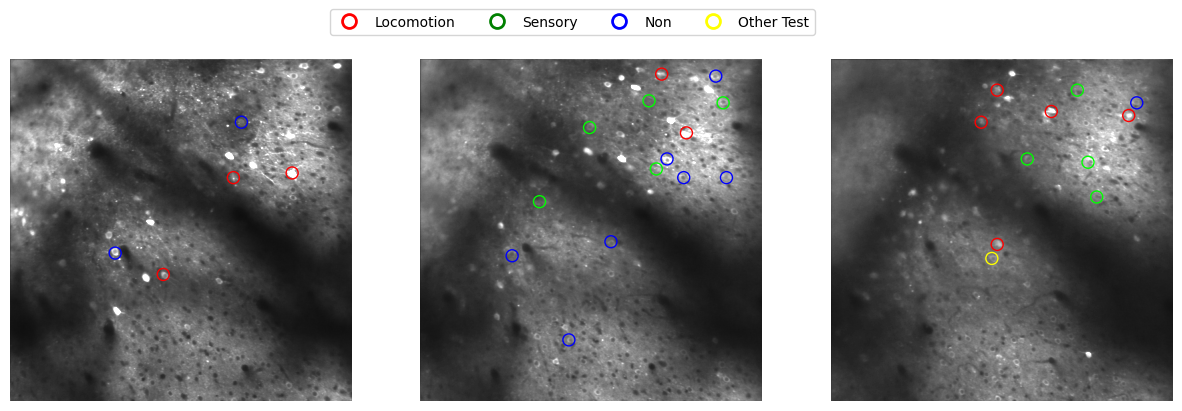

In [220]:
# Convert ETL string to a list of floats
importlib.reload(CB)
fig, axes = CB.multi_planes_2d_show(refImg1, None, FilteredTestPos3D, None, zdepth, colorTarget, img_clim=[0,1000], plot_param=None)

legend_labels = ['Locomotion', 'Sensory', 'Non', 'Other Test']
legend_colors = ['red', 'green', 'blue', 'yellow']

# Create Legend patches using Line2D for circles
legend_patches = [mlines.Line2D([0], [0], color=color, marker='o', linestyle='None', 
                                markersize=10, markeredgewidth=2, fillstyle='none') 
                  for color in legend_colors]
# Add the Legend to the figure
fig.legend(handles=legend_patches, labels=legend_labels, loc='upper center', 
           ncol=len(legend_labels), fontsize=10, bbox_to_anchor=(0.5, 0.95))


save_path = os.path.join(ProcessFolder, "FinalTargets_Suite2p.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')
save_path = os.path.join(ProcessFolder, "FinalTargets_Suite2p.tif")
fig.savefig(save_path, dpi=300, bbox_inches='tight')
save_path = os.path.join(ProcessFolder, "FinalTargets_Suite2p.svg")
fig.savefig(save_path, dpi=300, bbox_inches='tight')
save_path = os.path.join(ProcessFolder, "FinalTargets_Suite2p.eps")
fig.savefig(save_path, dpi=300, bbox_inches='tight')
# Save the figure before showing
 
plt.show()